In [36]:
import os
import sys

import math
import numpy as np

from typing import Tuple

import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'C:\\Users\\rzamb\\Documents\\UMD\\642_Robotics\\finalProject'

In [10]:
def load_training_data(path:str)->list:
    list_output = []
    with open(path, 'r') as file:
        for line in file:
            # Remove the newline character at the end of the line
            line = line.strip()
            # Append the line to the list
            list_output.append(line)
    return list_output

In [13]:
PATH = 'C:/Users/rzamb/Documents/UMD/642_Robotics/finalProject/state_dict_experiment_3/'
file1 = 'training_output_1.txt'
file2 = 'training_output_2.txt'
file3 = 'training_output_3.txt'
file4 = 'training_output_4.txt'
file5 = 'training_output_5.txt'
file6 = 'training_output_6.txt'
file7 = 'training_output_7.txt'

In [97]:
out1 = load_training_data(os.path.join(PATH,file1))
out2 = load_training_data(os.path.join(PATH,file2))
out3 = load_training_data(os.path.join(PATH,file3))
out4 = load_training_data(os.path.join(PATH,file4))
out5 = load_training_data(os.path.join(PATH,file5))
out6 = load_training_data(os.path.join(PATH,file6))
out7 = load_training_data(os.path.join(PATH,file7))

In [98]:
# Discard first output. This is because the environment start makes episodes artificially longer

out1 = out1[10:]
out2 = out2[11:]
out3 = out3[11:] 
out4 = out4[11:] 
out5 = out5[11:] 
out6 = out6[11:] 
# No need for out7 because it starts at 238  

In [99]:
def extract_episode_data(out_lst:list)->Tuple[list,list,list,list,list,list]:

    # Extracting cumulative reward
    reward = [int(item.split(' ')[-1]) for item in out_lst if 'Reward' in item] 
    
    # Extracting duration
    duration = [int(item.split(' ')[-1]) for item in out_lst if 'duration' in item] 
    
    # Extracting exploration steps
    exploration = [int(item.split(' ')[-1]) for item in out_lst if 'Exploration' in item] 
    
    # Extracting exploitation steps
    exploitation = [int(item.split(' ')[-1]) for item in out_lst if 'Exploitation' in item] 
    
    # Extracting steps taken
    steps = [int(item.split(' ')[-1]) for item in out_lst if 'taken' in item] 
    
    # Extracting epoch
    epoch = [item.split(' ')[-1] for item in out_lst if 'Epoch' in item] 

    return reward, duration, exploration, exploitation, steps, epoch

In [100]:
rewards_1, durations_1, exploration_1, exploitation_1, steps_total_training_round_1, epoch_1_ = extract_episode_data(out1)

In [101]:
epoch_1 = [int(eval(item)) for item in epoch_1_]

In [102]:
epoch_1[-2] = epoch_1[-2] + 200 
epoch_1[-2]

249

In [103]:
def extract_episode_data(out_lst:list)->Tuple[list,list,list,list,list,list]:

    # Extracting cumulative reward
    reward = [int(item.split(' ')[-1]) for item in out_lst if 'Reward' in item] 
    
    # Extracting duration
    duration = [int(item.split(' ')[-1]) for item in out_lst if 'duration' in item] 
    
    # Extracting exploration steps
    exploration = [int(item.split(' ')[-1]) for item in out_lst if 'Exploration' in item] 
    
    # Extracting exploitation steps
    exploitation = [int(item.split(' ')[-1]) for item in out_lst if 'Exploitation' in item] 
    
    # Extracting steps taken
    steps = [int(item.split(' ')[-1]) for item in out_lst if 'taken' in item] 
    
    # Extracting epoch
    epoch = [int(item.split(' ')[-1]) for item in out_lst if 'Epoch' in item] 

    return reward, duration, exploration, exploitation, steps, epoch

In [104]:
rewards_2, durations_2, exploration_2, exploitation_2, steps_total_training_round_2, epoch_2 = extract_episode_data(out2)
rewards_3, durations_3, exploration_3, exploitation_3, steps_total_training_round_3, epoch_3 = extract_episode_data(out3)
rewards_4, durations_4, exploration_4, exploitation_4, steps_total_training_round_4, epoch_4 = extract_episode_data(out4)
rewards_5, durations_5, exploration_5, exploitation_5, steps_total_training_round_5, epoch_5 = extract_episode_data(out5)
rewards_6, durations_6, exploration_6, exploitation_6, steps_total_training_round_6, epoch_6 = extract_episode_data(out6)
rewards_7, durations_7, exploration_7, exploitation_7, steps_total_training_round_7, epoch_7 = extract_episode_data(out7)

In [105]:
print('## File 1 ##')
print(epoch_1[0],epoch_1[-1],)
print(len(epoch_1))
print('## File 2 ##')
print(epoch_2[0],epoch_2[-1],)
print(len(epoch_2))
print('## File 3 ##')
print(epoch_3[0],epoch_3[-1],)
print(len(epoch_3))
print('## File 4 ##')
print(epoch_4[0],epoch_4[-1],)
print(len(epoch_4))
print('## File 5 ##')
print(epoch_5[0],epoch_5[-1],)
print(len(epoch_5))
print('## File 6 ##')
print(epoch_6[0],epoch_6[-1],)
print(len(epoch_6))
print('## File 7 ##')
print(epoch_7[0],epoch_7[-1],)
print(len(epoch_7))

## File 1 ##
2 250
249
## File 2 ##
2 100
99
## File 3 ##
2 200
199
## File 4 ##
2 200
199
## File 5 ##
2 50
49
## File 6 ##
2 200
199
## File 7 ##
238 900
663


In [106]:
ep2 = [(item+250) for item in epoch_2]
ep3 = [(item+350) for item in epoch_3] 
ep4 = [(item+550) for item in epoch_4]
ep5 = [(item+750) for item in epoch_5]
ep6 = [(item+800) for item in epoch_6]
ep7 = [(item+1000) for item in epoch_7]

In [107]:
rewards = rewards_1 + rewards_2 + rewards_3 + rewards_4 + rewards_5 + rewards_6 + rewards_7
durations = durations_1 + durations_2 + durations_3 + durations_4 + durations_5 + durations_6 + durations_7
exploration = exploration_1 + exploration_2 + exploration_3 + exploration_4 + exploration_5 + exploration_6 + exploration_7
exploitation = exploitation_1 + exploitation_2 + exploitation_3 + exploitation_4 + exploitation_5 + exploitation_6 + exploitation_7
steps_total_training_round = steps_total_training_round_1 + steps_total_training_round_2+ steps_total_training_round_3 + steps_total_training_round_4 + steps_total_training_round_5 + steps_total_training_round_6 + steps_total_training_round_7
epochs = epoch_1 + ep2 + ep3 + ep4 + ep5 + ep6 + ep7

In [111]:
x_axis = list(range(1658))
x_axis = x_axis[1:]

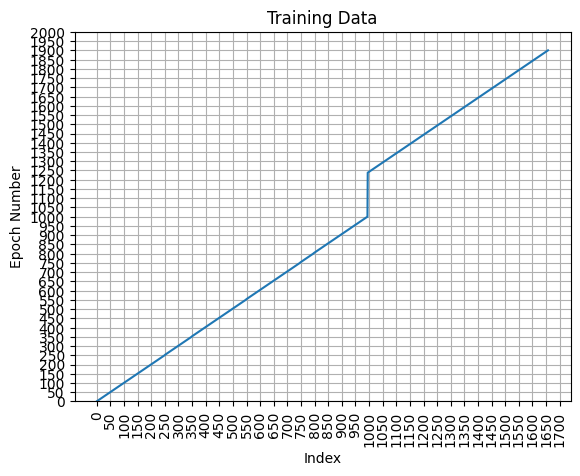

In [112]:
plt.title("Training Data")
plt.xlabel("Index")
plt.ylabel("Epoch Number")

plt.ylim(0, 2000)
plt.xticks(np.arange(0, 1701, 50))
plt.yticks(np.arange(0, 2001, 50))
plt.xticks(rotation = 90)

plt.plot(x_axis,epochs)
plt.grid()
plt.show()

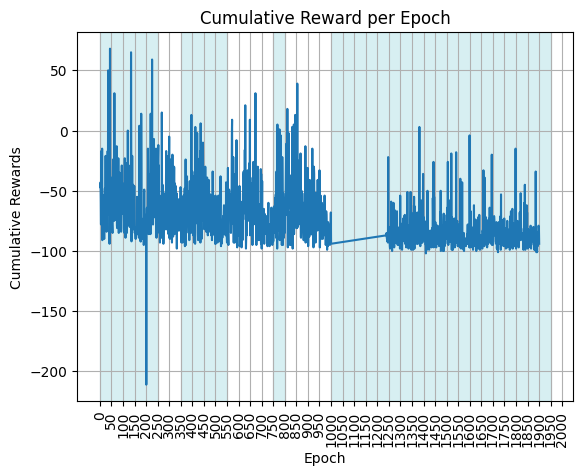

In [132]:
plt.title("Cumulative Reward per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Cumulative Rewards")

plt.xticks(np.arange(0, 2001, 50))
plt.xticks(rotation = 90)

plt.plot(epochs,rewards)

plt.axvspan(0, 250, alpha=0.5, color='powderblue')
plt.axvspan(350, 550, alpha=0.5, color='powderblue')
plt.axvspan(750, 800, alpha=0.5, color='powderblue')
plt.axvspan(1000, 1950, alpha=0.5, color='powderblue')

plt.grid()
plt.show()

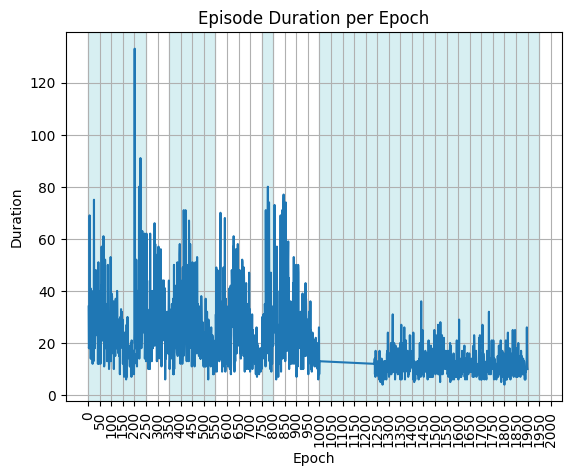

In [124]:
plt.title("Episode Duration per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Duration")

plt.xticks(np.arange(0, 2001, 50))
plt.xticks(rotation = 90)

plt.axvspan(0, 250, alpha=0.5, color='powderblue')
plt.axvspan(350, 550, alpha=0.5, color='powderblue')
plt.axvspan(750, 800, alpha=0.5, color='powderblue')
plt.axvspan(1000, 1950, alpha=0.5, color='powderblue')

plt.plot(epochs,durations)
plt.grid()
plt.show()

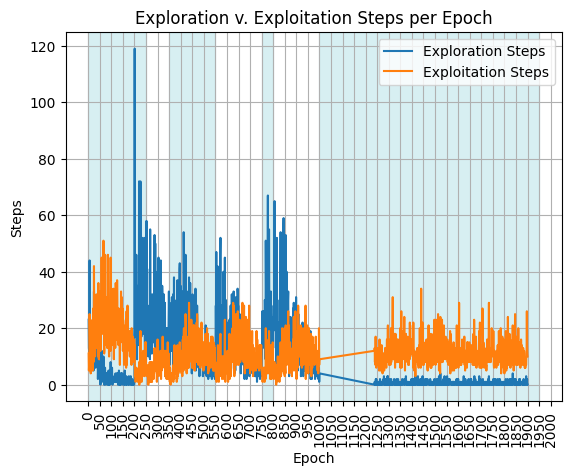

In [125]:
plt.title("Exploration v. Exploitation Steps per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Steps")

plt.xticks(np.arange(0, 2001, 50))
plt.xticks(rotation = 90)

plt.axvspan(0, 250, alpha=0.5, color='powderblue')
plt.axvspan(350, 550, alpha=0.5, color='powderblue')
plt.axvspan(750, 800, alpha=0.5, color='powderblue')
plt.axvspan(1000, 1950, alpha=0.5, color='powderblue')

plt.plot(epochs, exploration, label='Exploration Steps')
plt.plot(epochs, exploitation, label='Exploitation Steps')
plt.legend() 

plt.grid()
plt.show()

### Experiment 4 - Lower Tau

In [133]:
PATH = 'C:/Users/rzamb/Documents/UMD/642_Robotics/finalProject/state_dict_experiment_4/'
file8 = 'training_output_1.txt'
out8 = load_training_data(os.path.join(PATH,file8))
out8 = out8[10:]
rewards_8, durations_8, exploration_8, exploitation_8, steps_total_training_round_8, epoch_8 = extract_episode_data(out8)

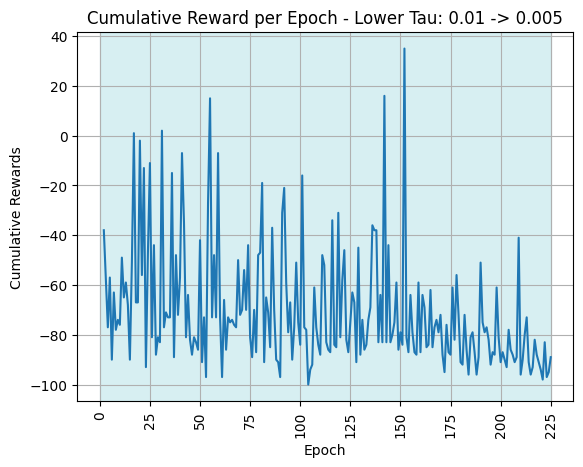

In [138]:
plt.title("Cumulative Reward per Epoch - Lower Tau: 0.01 -> 0.005")
plt.xlabel("Epoch")
plt.ylabel("Cumulative Rewards")

plt.xticks(np.arange(0, 226, 25))
plt.xticks(rotation = 90)

plt.plot(epoch_8,rewards_8)

plt.axvspan(0, 225, alpha=0.5, color='powderblue')

plt.grid()
plt.show()

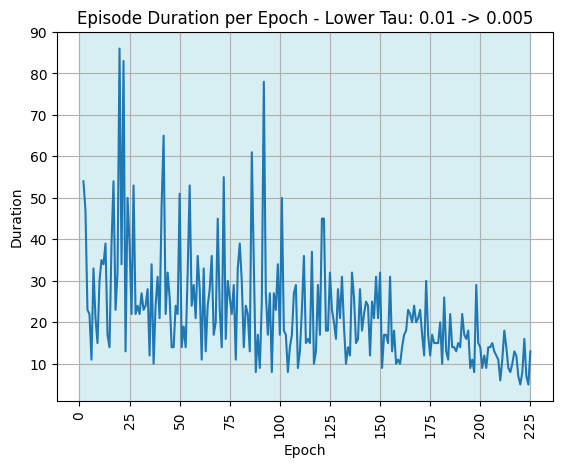

In [139]:
plt.title("Episode Duration per Epoch - Lower Tau: 0.01 -> 0.005")
plt.xlabel("Epoch")
plt.ylabel("Duration")

plt.xticks(np.arange(0, 226, 25))
plt.xticks(rotation = 90)

plt.axvspan(0, 225, alpha=0.5, color='powderblue')

plt.plot(epoch_8,durations_8)
plt.grid()
plt.show()

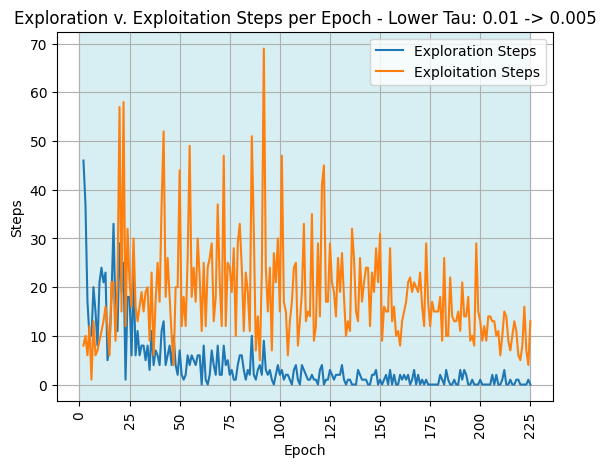

In [140]:
plt.title("Exploration v. Exploitation Steps per Epoch - Lower Tau: 0.01 -> 0.005")
plt.xlabel("Epoch")
plt.ylabel("Steps")

plt.xticks(np.arange(0, 226, 25))
plt.xticks(rotation = 90)

plt.axvspan(0, 225, alpha=0.5, color='powderblue')

plt.plot(epoch_8, exploration_8, label='Exploration Steps')
plt.plot(epoch_8, exploitation_8, label='Exploitation Steps')
plt.legend() 

plt.grid()
plt.show()

### Experiment 5 - Lower Tau and Higher Epsilon Decay

In [141]:
PATH = 'C:/Users/rzamb/Documents/UMD/642_Robotics/finalProject/state_dict_experiment_5/'
file9 = 'training_output_9.txt'
out9 = load_training_data(os.path.join(PATH,file9))
out9 = out9[10:]
rewards_9, durations_9, exploration_9, exploitation_9, steps_total_training_round_9, epoch_9 = extract_episode_data(out9)

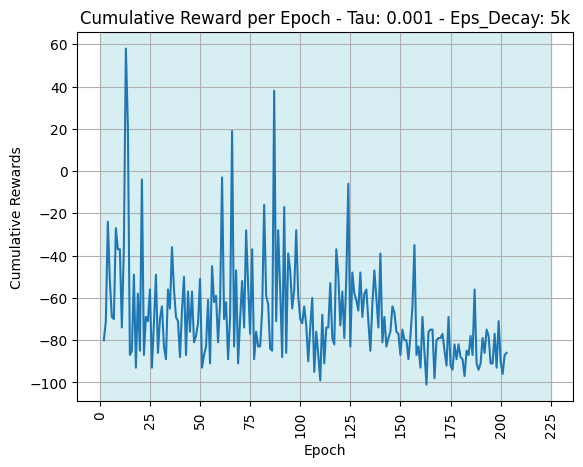

In [145]:
plt.title("Cumulative Reward per Epoch - Tau: 0.001 - Eps_Decay: 5k")
plt.xlabel("Epoch")
plt.ylabel("Cumulative Rewards")

plt.xticks(np.arange(0, 226, 25))
plt.xticks(rotation = 90)

plt.plot(epoch_9,rewards_9)

plt.axvspan(0, 225, alpha=0.5, color='powderblue')

plt.grid()
plt.show()

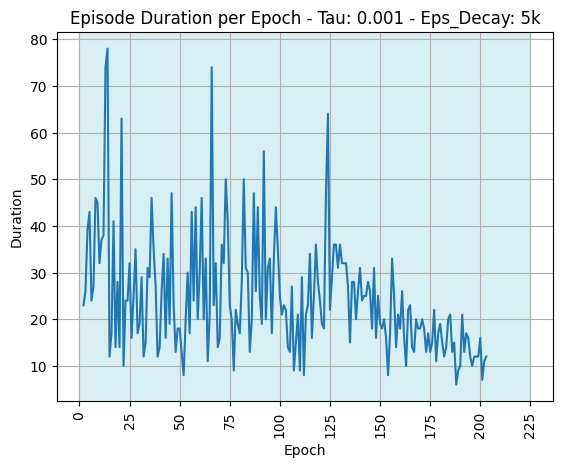

In [146]:
plt.title("Episode Duration per Epoch - Tau: 0.001 - Eps_Decay: 5k")
plt.xlabel("Epoch")
plt.ylabel("Duration")

plt.xticks(np.arange(0, 226, 25))
plt.xticks(rotation = 90)

plt.axvspan(0, 225, alpha=0.5, color='powderblue')

plt.plot(epoch_9,durations_9)
plt.grid()
plt.show()

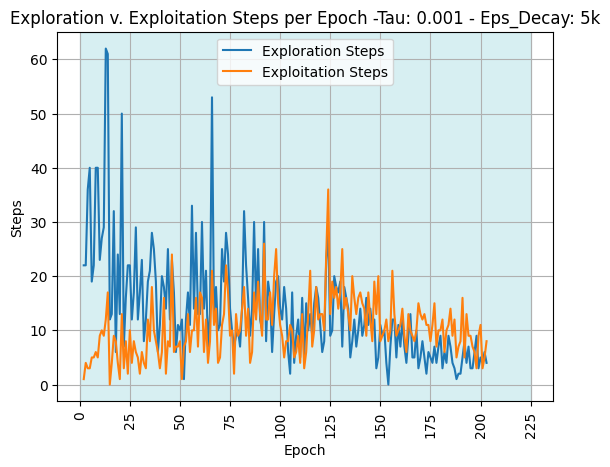

In [147]:
plt.title("Exploration v. Exploitation Steps per Epoch -Tau: 0.001 - Eps_Decay: 5k")
plt.xlabel("Epoch")
plt.ylabel("Steps")

plt.xticks(np.arange(0, 226, 25))
plt.xticks(rotation = 90)

plt.axvspan(0, 225, alpha=0.5, color='powderblue')

plt.plot(epoch_9, exploration_9, label='Exploration Steps')
plt.plot(epoch_9, exploitation_9, label='Exploitation Steps')
plt.legend() 

plt.grid()
plt.show()

### Experiment 6 - Same Tau, Intermediate Epsilon Decay, and Narrow Action Space

In [148]:
PATH = 'C:/Users/rzamb/Documents/UMD/642_Robotics/finalProject/state_dict_experiment_6/'
file10 = 'training_output_10.txt'
out10 = load_training_data(os.path.join(PATH,file10))
out10 = out10[10:]
rewards_10, durations_10, exploration_10, exploitation_10, steps_total_training_round_10, epoch_10 = extract_episode_data(out10)

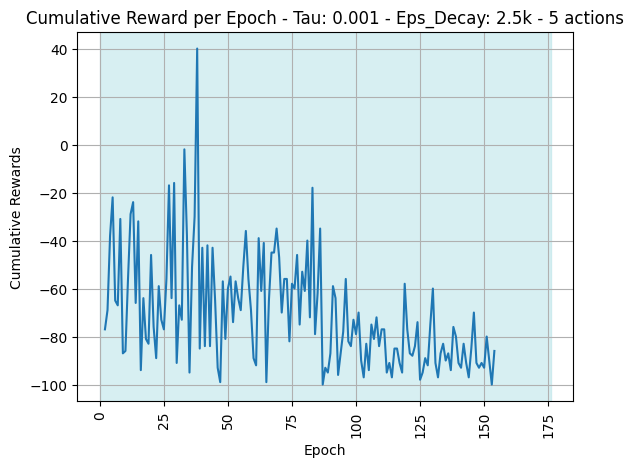

In [149]:
plt.title("Cumulative Reward per Epoch - Tau: 0.001 - Eps_Decay: 2.5k - 5 actions")
plt.xlabel("Epoch")
plt.ylabel("Cumulative Rewards")

plt.xticks(np.arange(0, 176, 25))
plt.xticks(rotation = 90)

plt.plot(epoch_10,rewards_10)

plt.axvspan(0, 176, alpha=0.5, color='powderblue')

plt.grid()
plt.show()

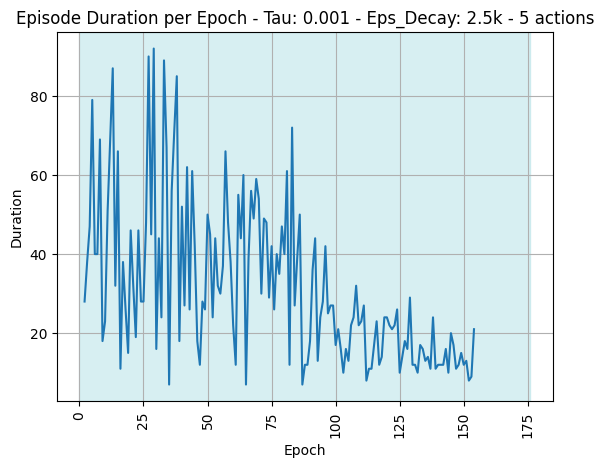

In [150]:
plt.title("Episode Duration per Epoch - Tau: 0.001 - Eps_Decay: 2.5k - 5 actions")
plt.xlabel("Epoch")
plt.ylabel("Duration")

plt.xticks(np.arange(0, 176, 25))
plt.xticks(rotation = 90)

plt.axvspan(0, 176, alpha=0.5, color='powderblue')

plt.plot(epoch_10,durations_10)
plt.grid()
plt.show()

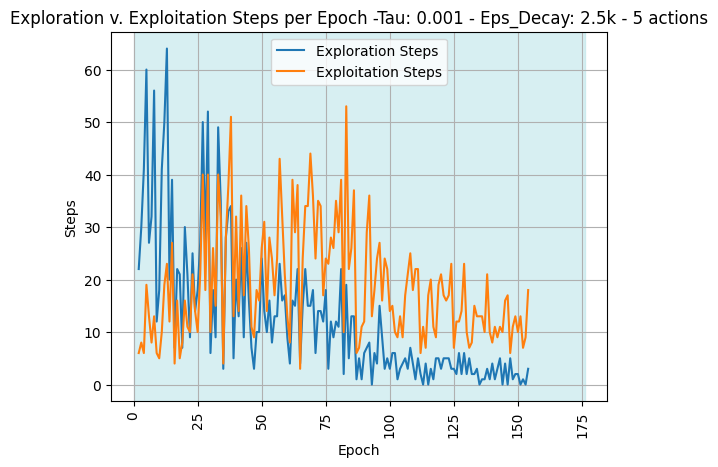

In [151]:
plt.title("Exploration v. Exploitation Steps per Epoch -Tau: 0.001 - Eps_Decay: 2.5k - 5 actions")
plt.xlabel("Epoch")
plt.ylabel("Steps")

plt.xticks(np.arange(0, 176, 25))
plt.xticks(rotation = 90)

plt.axvspan(0, 176, alpha=0.5, color='powderblue')

plt.plot(epoch_10, exploration_10, label='Exploration Steps')
plt.plot(epoch_10, exploitation_10, label='Exploitation Steps')
plt.legend() 

plt.grid()
plt.show()